# プログラム

In [1]:
import tkinter as tk
# 関数
class Btn:
    def __init__(self):
        self.light_list = ['img/OFF.png', 'img/ON.png']
        self.food_list = ['img/Empty.png', 'img/Full.png']
        self.power = False
        self.light_state = self.light_list[0]
        self.food_state = self.food_list[0]

    # 照明ボタン
    def light_button(self):
        if self.power:
            self.light_state = self.light_list[0]
            self.power = False
            return self.light_state
        else:
            self.light_state = self.light_list[1]
            self.power = True
            return self.light_state
    
    # レバー
    def lever(self):
        if self.power:
            self.food_state = self.food_list[1]
        return self.food_state
    
    # 餌を消す
    def remove(self):
        self.food_state = self.food_list[0]
        return self.food_state

# GUI        
class App:
    def __init__(self):
        # 関数クラスをインスタンス化
        self.btn = Btn()

        # ウィンドウ設定
        self.title = 'Skinner Box'
        self.geometry = "340x250"
        self.bg = 'white'
        self.font_name = 'Yu Gothic'
        self.font_size = 18
        self.font = (self.font_name, self.font_size)

        # ウィンドウの生成
        self.root = tk.Tk()
        self.root.title(self.title)
        self.root.geometry(self.geometry)

        # ウィンドウ内に画像のフレームとボタンのフレームを生成
        self.state_frame = tk.Frame(self.root, width=300, height=185)
        self.button_frame = tk.Frame(self.root)

        # キャンバスの生成
        self.light_canvas = tk.Canvas(self.state_frame, width=150, height=185)
        self.food_canvas = tk.Canvas(self.state_frame, width=150, height=185)

        # 画像ファイルの読み込み
        self.light_pic = tk.PhotoImage(file=self.btn.light_state, master=self.state_frame)
        self.food_pic = tk.PhotoImage(file=self.btn.food_state, master=self.state_frame)

        # 画像をキャンバス上に生成
        self.light_label = self.light_canvas.create_image(0, 0, image=self.light_pic, anchor=tk.NW)
        self.food_label = self.food_canvas.create_image(0, 0, image=self.food_pic, anchor=tk.NW)

        # ボタンの生成
        self.light_button = tk.Button(self.button_frame, text='照明', font=self.font, command=self.light)
        self.lever = tk.Button(self.button_frame, text='レバー', font=self.font, command=self.food)        

        # ウィジェットを表示
        # フレーム
        self.state_frame.pack()
        self.button_frame.pack()
        # 画像とボタン
        self.light_canvas.grid(row=0, column=0)
        self.food_canvas.grid(row=0, column=1)
        self.light_button.grid(row=0, column=0, padx=40)
        self.lever.grid(row=0, column=1, padx=40)


        # 餌の消える時間
        self.delay = 1000

    def light(self):
        # ライトのオンオフ
        state = self.btn.light_button()

        # 画像の切替

        # 画像の読み込み
        self.new_light = tk.PhotoImage(file=state, master=self.state_frame)
        # 画像の反映
        self.light_canvas.itemconfig(self.light_label, image=self.new_light)
            
    def food(self):
        # 餌を出現
        state = self.btn.lever()

        # 画像の切替

        # 画像の読み込み
        self.new_food = tk.PhotoImage(file=state, master=self.state_frame)
        # 画像の反映
        self.food_canvas.itemconfig(self.food_label, image=self.new_food)

        # えさがあるときのみ一定時間経過後えさが消える
        if self.btn.food_state == self.btn.food_list[1]:
            # self.delay=1000ms後に消える
            self.root.after(self.delay, self.remove)
    
    # エサを消すメソッド
    def remove(self):
        # エサがない状態にする
        state = self.btn.remove()

        # 画像の切替

        # 画像の読み込み
        self.new_food = tk.PhotoImage(file=state, master=self.state_frame)
        # 画像の反映
        self.food_canvas.itemconfig(self.food_label, image=self.new_food)


    def mainloop(self):
        self.root.mainloop()

def main():
    c = App()
    c.mainloop()

if __name__ == '__main__':
    main()

# レポート文書

## 使い方

図１

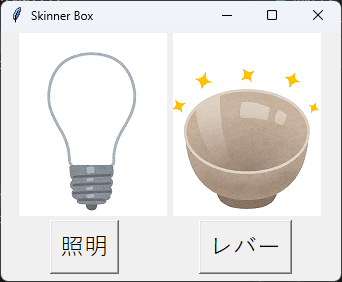

図1の状態で照明ボタンを押すと照明がつき図2のようになる。
図1の状態でレバーを押しても何も起こらない。

図2


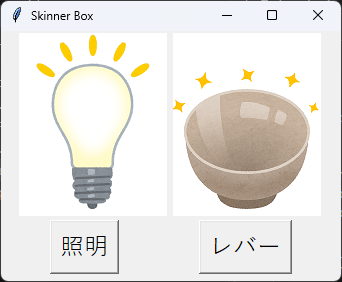

図2の状態で照明を押すと照明が消えて図1の状態になる。
図2の状態でレバーを押すとエサ(ごはん)が現れ図3の状態になる。

図3


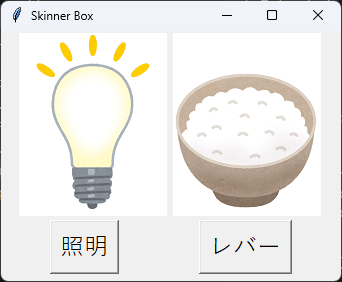

図3の状態から1秒経過すると図2の状態に戻る。




画像の引用元

ON.png: https://2.bp.blogspot.com/-QpIzYIhX_R0/VrN1H-ENQYI/AAAAAAAA3xU/v8lJEBoRMGA/s800/denkyuu_on.png

OF.png: https://2.bp.blogspot.com/-bB1KTaBEAm0/VrN1H-lrLFI/AAAAAAAA3xQ/2HKUMC-7kGw/s800/denkyuu_off.png

Empty.png: https://3.bp.blogspot.com/-MkexMlCjZ0E/WzC91SFsthI/AAAAAAABM8Q/IOWcx9tF-CQ-5xYK8_DqCPPqBPoMgdWzQCLcBGAs/s800/ochawan_kirei.png

Full.png: https://4.bp.blogspot.com/-v5s7WoTrnfI/VGLLIakja2I/AAAAAAAAoug/cd9rjVVIVxQ/s800/food_gohan_ochawan.png


## プログラムの説明
BtnクラスとAppクラスで構成されている。

### Btnクラス
Btnクラスにはボタンの機能と、照明、エサの状態が格納されている。
powerインスタンスでは照明のオンオフをBooleanで表す。
light_state, food_stateは照明のオンオフ、エサの有無を表す画像のパスを格納。

light_buttonメソッドでは、power, light_stateを変化させる。照明がオンの状態ならオフの状態に、オフの状態ならオンの状態にする。

leverメソッドは照明がオンのときのみ動作し、food_stateをえさがある状態にする。

removeメソッドはfood_stateをエサがない状態にする。

これらのメソッドはすべて戻り値を画像ファイルのパスを引き渡す。


### Appクラス
AppクラスはGUIアプリの情報を格納。

#### __init__で初期化

btnでBtnクラスをインスタンス化
その後はウィンドウを生成し、上段に画像を表示するフレームstate_frame、下段にボタンを表示するbutton_frameを生成

state_frame上に、照明の画像を表示するキャンバスlight_camvasとエサの画像を表示するキャンバスfood_canvasを生成

light_pic, food_picで照明とエサの今の状態の画像ファイルをそれぞれ読み込み

light_label, food_labelで読み込んだ画像をそれぞれのキャンバス上に生成

light_button, leverで照明ボタンとレバーを生成

light_buttonは下で記載するlightメソッドを呼び出し照明のオンオフを切り替え,leverはfoodメソッドを呼び出し照明がついているときのみエサを出現させる

packでframeを、gridで画像とボタンを指定の位置に表示

self.delayでエサが出現してから消えるまでの時間を設定

#### Appのメソッド

lightメソッドではまずBtnクラスのlight_buttonメソッドを呼び出して照明の状態を切り替えて、それぞれの状態に応じた画像ファイルのパスを戻り値として受け取る。そのあとnew_lightで戻り値のパスの画像を読み込み,itemconfigで反映する。

foodメソッドはまずBtnクラスのleverメソッドを呼び出し、照明の状態に応じてエサの状態を変化させる。エサの状況に応じた画像ファイルのパスを戻り値としてうけとり、new_foodでその画像を読み込んでitemconfigで反映。さらのエサがあるときはafterメソッドでエサの出現から1秒後に下で記載するAppクラスのremoveメソッドを呼び出して再びエサがない状態にする。

removeメソッドはまずBtnクラスのremoveメソッドを呼び出しエサがない状態にし画像ファイルのパスを受けとる。その後new_foodでパスを読み込みitemconfigで反映。

